In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

%run cleaning_acled.ipynb
%run cleaning_ucdp.ipynb

2011-08-19 00:00:00
60


In [53]:
country = 'colombia'

In [54]:
ucleaner = UCDPCleaner(country)

ucdp = ucleaner.data
ucdp.shape


(9053, 49)

dates range from 1989-01-01 to 2022-12-13


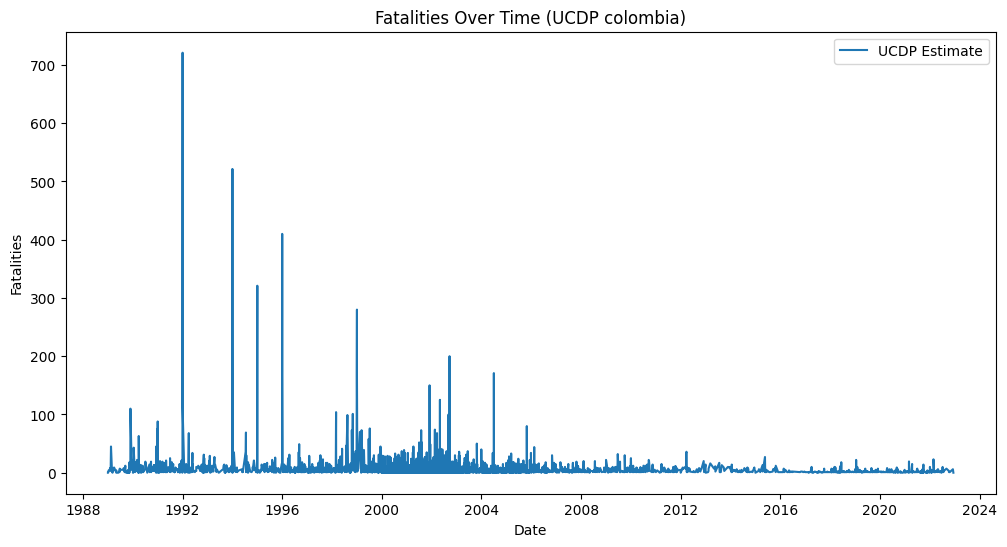

In [55]:
ucleaner.plot()

dates range from 2018-01-01 to 2024-03-01


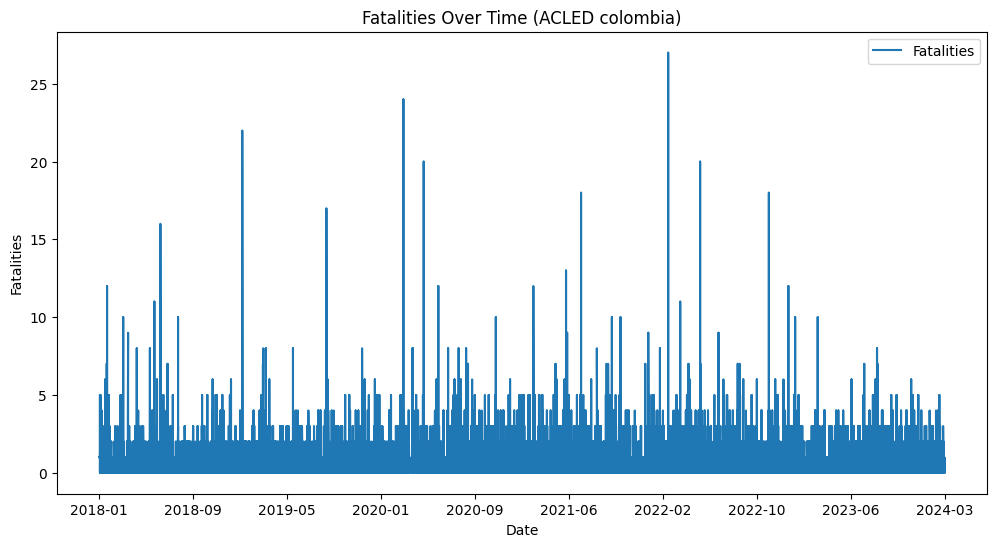

In [57]:
acleaner = ACLEDCleaner(country)
acled = acleaner.data
acleaner.plot()

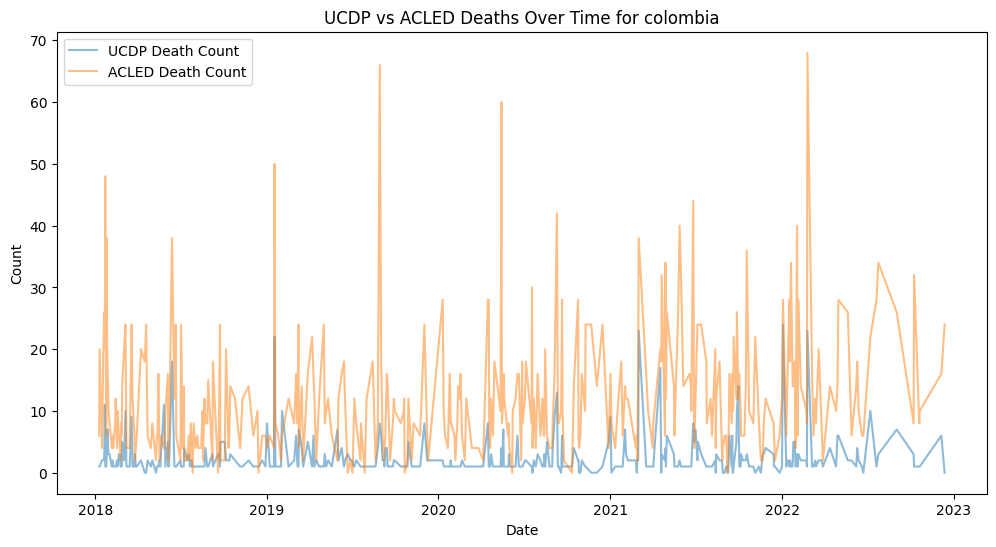

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'date' columns to datetime format
ucdp['date'] = pd.to_datetime(ucdp['date_start'])
acled['date'] = pd.to_datetime(acled['event_date'])

# Find the overlapping date range
start_date = max(ucdp['date'].min(), acled['date'].min())
end_date = min(ucdp['date'].max(), acled['date'].max())

# Clip both dataframes to the overlapping date range
ucdp_clipped = ucdp[(ucdp['date'] >= start_date) & (ucdp['date'] <= end_date)]
acled_clipped = acled[(acled['date'] >= start_date) & (acled['date'] <= end_date)]

# Group by date and sum the 'best' and 'fatalities' columns
ucdp_grouped = ucdp_clipped.groupby('date')['best'].sum().reset_index()
acled_grouped = acled_clipped.groupby('date')['fatalities'].sum().reset_index()

# Merge the grouped dataframes on the date column
merged_df = pd.merge(ucdp_grouped, acled_grouped, on='date', how='inner')

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(merged_df['date'], merged_df['best'], label='UCDP Death Count', alpha=0.5)
plt.plot(merged_df['date'], merged_df['fatalities'], label='ACLED Death Count', alpha=0.5)
plt.title(f'UCDP vs ACLED Deaths Over Time for {country}')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()

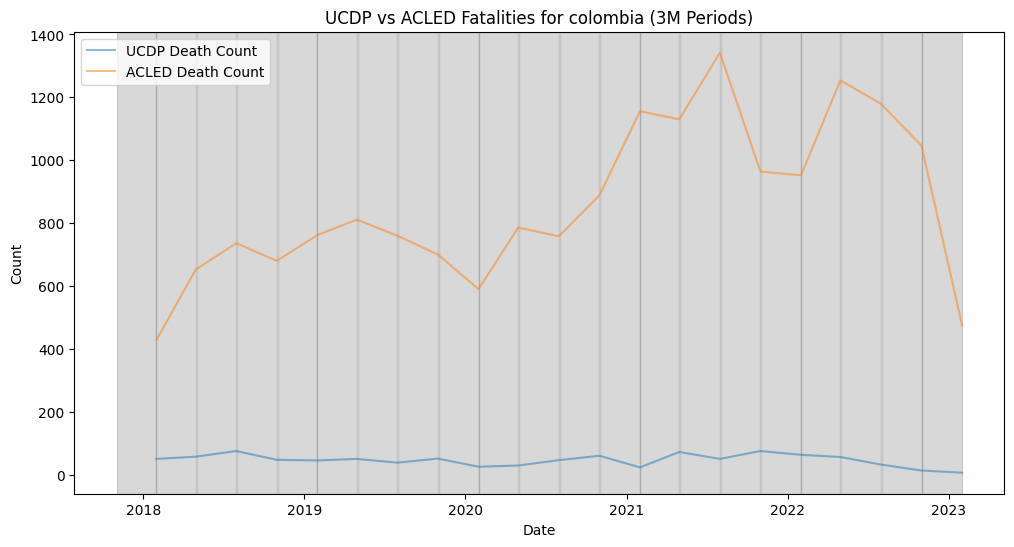

In [59]:
# resample time 
timescale = '3M'
days = 90
ucdp_resampled = ucdp_clipped.resample(timescale, on='date')['best'].sum()
acled_resampled = acled_clipped.resample(timescale, on='date')['fatalities'].sum()

# Merge the resampled series into a dataframe
merged_df = pd.merge(ucdp_resampled, acled_resampled, left_index=True, right_index=True, how='inner').reset_index()

# Calculate the disagreement percentage
merged_df['disagreement'] = abs(merged_df['best'] - merged_df['fatalities']) / (merged_df['best'])
#  + merged_df['fatalities']) / 2

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(merged_df['date'], merged_df['best'], label='UCDP Death Count', alpha=0.5)
plt.plot(merged_df['date'], merged_df['fatalities'], label='ACLED Death Count', alpha=0.5)

# Shade periods with more than 100% disagreement
for i, row in merged_df.iterrows():
    if row['disagreement'] > 1:
        plt.axvspan(row['date'] - pd.Timedelta(days=days), row['date'], color='grey', alpha=0.3)

plt.title(f'UCDP vs ACLED Fatalities for {country} ({timescale} Periods)')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()

In [41]:
ucdp_duration = ucleaner.duration()

(array([918.,  22.,  22.,   4.,   2.,   3.,   0.,   0.,   1.,   2.]),
 array([  0. ,  36.5,  73. , 109.5, 146. , 182.5, 219. , 255.5, 292. ,
        328.5, 365. ]),
 <BarContainer object of 10 artists>)

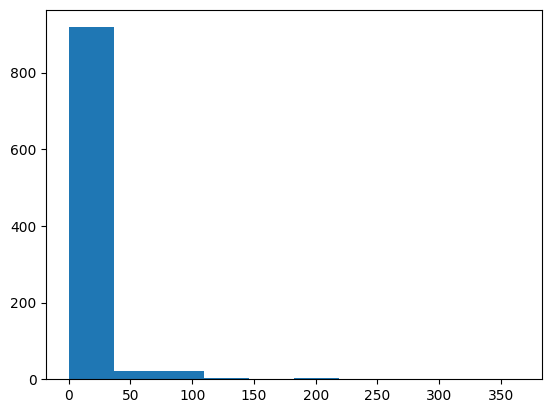

In [48]:
ucdp_duration['duration_days'] = ucdp_duration['duration'].dt.days
plt.hist(ucdp_duration['duration_days'].values)



In [54]:
acled

,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,...,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp,date
0,SSD9768,2024-02-28,2024,1,Strategic developments,Strategic developments,Looting/property destruction,Military Forces of South Sudan (2011-),NaN,1,...,5.0978,31.5822,1,VOA,International,"Property destruction: On 28 February 2024, sol...",0,NaN,1709590399,2024-02-28
1,SSD9767,2024-02-27,2024,1,Strategic developments,Strategic developments,Looting/property destruction,Boya Ethnic Militia (South Sudan),NaN,4,...,4.8822,33.5102,2,Radio Tamazuj,National,"Looting: On 27 February 2024, suspected Boya r...",0,NaN,1709590399,2024-02-27
2,SSD9770,2024-02-27,2024,1,Political violence,Violence against civilians,Sexual violence,Toposa Ethnic Militia (South Sudan),NaN,4,...,4.5187,33.3219,2,Radio Tamazuj,National,"On 27 February 2024, suspected Toposa (describ...",0,women targeted: girls,1709590399,2024-02-27
3,SSD9759,2024-02-25,2024,1,Political violence,Battles,Armed clash,NAS: National Salvation Front,NaN,2,...,4.8551,31.5799,1,Eye Radio (South Sudan); National Salvation Fr...,Other-National,"On 25 February 2024, NAS claimed to have attac...",0,NaN,1709590399,2024-02-25
4,SSD9765,2024-02-25,2024,1,Political violence,Violence against civilians,Attack,Murle Ethnic Militia (South Sudan),NaN,4,...,8.5945,31.9485,2,The City Review (South Sudan),National,"On 25 February 2024, suspected armed youth fro...",1,NaN,1709590399,2024-02-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9492,SSD3,2011-07-16,2011,1,Political violence,Violence against civilians,Abduction/forced disappearance,LRA: Lords Resistance Army,NaN,2,...,8.0262,26.0431,1,Resolve Crisis Initiative,Other,Two days after LRA forces abducted a man near ...,0,NaN,1633987184,2011-07-16
9493,SSD2,2011-07-15,2011,3,Political violence,Battles,Armed clash,George Athor Deng Rebel Group,NaN,2,...,6.7984,33.1308,1,Small Arms Survey,Other,"In June and July, forces loyal to Athor furthe...",0,NaN,1621903736,2011-07-15
9494,SSD5830,2011-07-15,2011,1,Political violence,Violence against civilians,Attack,Murle Ethnic Militia (South Sudan),NaN,4,...,8.0924,32.3906,2,Aid Worker Security Database,Local partner-Other,"On 15 July 2011, Murle militia attacked an uns...",0,NaN,1659980428,2011-07-15
9495,SSD1,2011-07-14,2011,1,Political violence,Violence against civilians,Abduction/forced disappearance,LRA: Lords Resistance Army,NaN,2,...,7.7150,26.1949,1,Resolve Crisis Initiative,Other,LRA forces abducted a man from his fields outs...,0,NaN,1633987184,2011-07-14
